# COMP90014 Assignment 1
### Semester 2, 2018

This assignment should be completed by each student individually. Make sure you read this entire document, and ask for help if anything is not clear. Any changes or clarification to this document will be announced via the LMS.

Please make sure you are aware of the University's rules on academic honesty and plagiarism, which are very strict: https://academichonesty.unimelb.edu.au/ 

Make sure you **do not** copy any code either from other students or from the internet. This is considered plagiarism. It is generally a good idea to avoid looking at any solutions as you may find it surprisingly difficult to generate your own solution to the problem once you have seen somebody else's.

Your completed notebook file containing all your answers will be turned in via LMS. No other files or formats will be accepted - only upload the completed `.ipynb` file.

### Overview
To complete the assignment you will need to finish the tasks in this notebook. There are multiple tasks that are connected in a logical order.

The tasks are a combination of writing your own implementations of algorithms we've discussed in lectures, writing your own code to use library implementations of these algorithms and interpreting the results in short answer format. Each short answer question has a word limit that will be strictly enforced!

In some case, we have provided test input and test output that you can use to try out your solutions. These tests are just samples and are not exhaustive - they may warn you if you've made a mistake, but they are not guaranteed to. It's up to you to decide whether your code is correct.

### Marking

Cells that must be completed to receive marks are clearly labeled. There are 16 graded cells, some of which are code cells, in which you must complete the code to solve a problem, and some of which are markdown cells, in which you must write your answers to short-answer questions. In addition to the graded cells, up to 8 marks will be given for code style, readability, efficiency and comments. 

The total marks for the assignment add up to 45, and it will be worth 15% of your overall subject grade.

### Background and data
During this assignment you will go through the steps to generate trees from a set of sequences. This includes calculating the distance matrices and the trees themselves using multiple algorithms. At each step of the process you will be asked to fill out short answer questions to demonstrate your understanding of the concepts.

The sequences you will use are the following [C2H2 zinc finger genes](https://en.wikipedia.org/wiki/Zinc_finger#Cys2His2) listed with links to their NCBI RefSeq records:
- [*KLF1*](https://www.ncbi.nlm.nih.gov/nuccore/NM_006563)
- [*KLF3*](https://www.ncbi.nlm.nih.gov/nuccore/NM_016531)
- [*KLF7*](https://www.ncbi.nlm.nih.gov/nuccore/NM_003709)
- [*YY1*](https://www.ncbi.nlm.nih.gov/nuccore/NM_003403)
- [*SP1*](https://www.ncbi.nlm.nih.gov/nuccore/NM_001251825)
- [*SP4*](https://www.ncbi.nlm.nih.gov/nuccore/NM_003112)
- [*SP8*](https://www.ncbi.nlm.nih.gov/nuccore/NM_182700)


### Task 1 - Setup

Create a new directory named `sequences` in the same place as your notebook and save a FASTA file for each of the sequences above in that directory. The sequence files must be named `<accession>.fa` where `<accession>` is the RefSeq accession number (e.g. `NM_006563.fa` for the *KLF1* sequence).

Once you've done that, you can run the code below to read in the sequences you just downloaded into a handy data structure. 

First, we create a dictionary `accessions` with gene names as keys and RefSeq accessions as values and populate it with the seven genes above.

Next we create a second dictionary `sequences` with gene names as keys and DNA sequence objects from the FASTA files as values. We read the FASTA files using the `scikit-bio` library method `skbio.sequence.DNA.read()`.

In [96]:
import os.path
import random
import skbio
from math import inf
from io import StringIO
from collections import OrderedDict, defaultdict
import numpy as np
from itertools import combinations
import math
import functools
import pandas

In [105]:
cd ~

/home/jreich


In [106]:
accessions = dict()
sequences = dict()

accessions['KLF1'] = "NM_006563"
accessions['KLF3'] = "NM_016531"
accessions['KLF7'] = "NM_003709"
accessions['YY1'] = "NM_003403"
accessions['SP1'] = "NM_001251825"
accessions['SP4'] = "NM_003112"
accessions['SP8'] = "NM_182700"

for key in accessions.keys():
    with open(os.path.join("sequences", "{}.fa".format(accessions[key]))) as fasta:
        sequences[key] = skbio.sequence.DNA.read(fasta)      

Run the cell below to see an overview of the information we've just read in. Make sure you understand what is being printed, and ask for help if you don't.

In [107]:
for key in accessions.keys():
    print(key, accessions[key], len(sequences[key]), str(sequences[key])[:10], sep='\t')

KLF1	NM_006563	1645	TCAGAGTTCA
KLF3	NM_016531	5632	TACTTACCCC
KLF7	NM_003709	8433	AGAGAAGCGA
YY1	NM_003403	3159	AGGGCGAACG
SP1	NM_001251825	7523	GTCCGGGTTC
SP4	NM_003112	6130	ATCAAGGGCG
SP8	NM_182700	3643	ATCATTGTAT


## Part 1 - Distance calculations
Distances between sequences can be calculated in a number of different ways. In this part, you will calculate distance matrices for a set of sequences in two different ways. 

### Task 2 - Creating a distance matrix
Write a function `init_distance_matrix` that creates a distance matrix as a dictionary of dictionaries (similar to the substitution matrix in the Week 03 - Trees lab). The dictionary keys should be gene names and the values should be `None` after initialization.

In [108]:
# ~~ GRADED CELL (2 marks) - complete this cell ~~
def init_distance_matrix(genes):
    """
    Take in a list of gene names and return a dict.
    The dict should be a nested 'dictionary of dictionaries', where the keys of the
    both the outer dict and the nested dicts are gene names.
    It should be possible to look up a value in the returned dict with a 
    call like dist[gene1][gene2].
    """
    # create a dictionary and sort the keys alphanumerically
    sorted_keys = sorted(genes)
    dist = {}
    # initialise the outer dictionary
    for gene in sorted_keys:
        dist[gene] = OrderedDict()   
    # initialise the inner/nested dictionary and set the values to None
    for gene in sorted_keys:
        for keys in (dist.keys()):
            dist[gene][keys] = None
    return dist

If you have implemented the code correctly, the following tests should give the right results:

In [109]:
# Should give: dict_keys(['KLF1', 'KLF3', 'KLF7', 'YY1', 'SP1', 'SP4', 'SP8'])
dist = init_distance_matrix(accessions.keys())
print(dist.keys())

dict_keys(['KLF1', 'KLF3', 'KLF7', 'SP1', 'SP4', 'SP8', 'YY1'])


In [110]:
# Should give: None
dist = init_distance_matrix(accessions.keys())
print(dist.values())

dict_values([OrderedDict([('KLF1', None), ('KLF3', None), ('KLF7', None), ('SP1', None), ('SP4', None), ('SP8', None), ('YY1', None)]), OrderedDict([('KLF1', None), ('KLF3', None), ('KLF7', None), ('SP1', None), ('SP4', None), ('SP8', None), ('YY1', None)]), OrderedDict([('KLF1', None), ('KLF3', None), ('KLF7', None), ('SP1', None), ('SP4', None), ('SP8', None), ('YY1', None)]), OrderedDict([('KLF1', None), ('KLF3', None), ('KLF7', None), ('SP1', None), ('SP4', None), ('SP8', None), ('YY1', None)]), OrderedDict([('KLF1', None), ('KLF3', None), ('KLF7', None), ('SP1', None), ('SP4', None), ('SP8', None), ('YY1', None)]), OrderedDict([('KLF1', None), ('KLF3', None), ('KLF7', None), ('SP1', None), ('SP4', None), ('SP8', None), ('YY1', None)]), OrderedDict([('KLF1', None), ('KLF3', None), ('KLF7', None), ('SP1', None), ('SP4', None), ('SP8', None), ('YY1', None)])])


In [111]:
# Should give an error!
dist = init_distance_matrix(accessions.keys())
print(dist['YY1']['SP4']['KLF1'])

TypeError: 'NoneType' object is not subscriptable

The following function will pretty-print a distance matrix that has been specified correctly.

In [112]:
def print_distance_matrix(dist):
    """
    Pretty-print a distance matrix.
    """
    genes = sorted(dist.keys())

    for s in [''] + genes:
        print("{: >10}".format(s), end='')
    print()

    for key1 in genes:
        print("{:10}".format(key1), end='')
        for key2 in genes:
            value = dist[key1][key2]
            if value is None:
                print("      None", end='')
            else:
                print("{: >#10.5f}".format(dist[key1][key2]), end='')
        print()

### Task 3 - Pairwise alignment scores as distances
The `skbio.alignment.local_pairwise_align_ssw()` library function calculates Striped Smith-Waterman alignments (banded alignment from the Week 2 lecture) using a highly optimized implementation. It returns a tuple containing:
- `TabularMSA` object describing the alignment
- alignment score
- tuple of aligned position ranges

Here is some example output from calling `skbio.alignment.local_pairwise_align_ssw()`. Notice that changing the order of the sequences doesn't change the alignment.

In [113]:
skbio.alignment.local_pairwise_align_ssw(sequences['KLF1'], sequences['YY1'])

(TabularMSA[DNA]
 --------------------------------------
 Stats:
     sequence count: 2
     position count: 38
 --------------------------------------
 CCCGCGCCCGGTC-CCGCC-ACGTCCCCCT-CCTTCCT
 CCCCCGCCCGCTCGCCGCCTTCCTCCCTCTGCCTTCCT, 30, [(735, 769), (357, 394)])

In [114]:
skbio.alignment.local_pairwise_align_ssw(sequences['YY1'], sequences['KLF1'])

(TabularMSA[DNA]
 --------------------------------------
 Stats:
     sequence count: 2
     position count: 38
 --------------------------------------
 CCCCCGCCCGCTCGCCGCCTTCCTCCCTCTGCCTTCCT
 CCCGCGCCCGGTC-CCGCC-ACGTCCCCCT-CCTTCCT, 30, [(357, 394), (735, 769)])

In [115]:
# Get just the score, by indexing into the tuple
result_tuple = skbio.alignment.local_pairwise_align_ssw(sequences['KLF1'], sequences['YY1'])
result_tuple[1]

30

In [116]:
# Get just the tuples showing aligned ranges
skbio.alignment.local_pairwise_align_ssw(sequences['KLF1'], sequences['YY1'])[2]

[(735, 769), (357, 394)]

Complete the function `create_pairwise_dist_matrix` below. This function should create a  distance matrix using your function `init_distance_matrix`, then use `skbio.alignment.local_pairwise_align_ssw()` to populate it with alignment scores. `skbio.alignment.local_pairwise_align_ssw()` returns a tuple, and the second item in the tuple is the alignment score. Use `1 / score` as the value in the distance matrix.

Recall that this matrix will be symmetrical so your solution should only calculate each alignment once.

In [190]:
# ~~ GRADED CELL (2 marks) - complete this cell ~~

def create_pairwise_dist_matrix(seqs):
    """
    Take in a dict with sequence names as keys and sequences as values.
    Return a dict representing the pairwise distances between all pairs of sequences.
    """  
    
    # create a list of the *unique* combinations of keys available - this will avoid redundant computations
    combo_list = list(combinations(seqs.keys(), 2))
    dist = init_distance_matrix(seqs)
    for key1, key2 in combo_list:
                
        result_tuple = skbio.alignment.local_pairwise_align_ssw(seqs[key1], seqs[key2])
         
        # set symmetrical cells to one another    
        dist[key1][key2] = dist[key2][key1] = 1/result_tuple[1]
        
        # set cells with identical keys to zero
        dist[key1][key1] = dist[key2][key2] = 0.0
            

    return dist

In [347]:
dist_pairwise = create_pairwise_dist_matrix(sequences)
print_distance_matrix(dist_pairwise)

                KLF1      KLF3      KLF7       SP1       SP4       SP8       YY1
KLF1         0.00000   0.01220   0.00833   0.02174   0.02500   0.00962   0.03333
KLF3         0.01220   0.00000   0.00855   0.02632   0.02439   0.02941   0.01786
KLF7         0.00833   0.00855   0.00000   0.02222   0.02632   0.02857   0.02857
SP1          0.02174   0.02632   0.02222   0.00000   0.00446   0.00606   0.02564
SP4          0.02500   0.02439   0.02632   0.00446   0.00000   0.01562   0.02778
SP8          0.00962   0.02941   0.02857   0.00606   0.01562   0.00000   0.01852
YY1          0.03333   0.01786   0.02857   0.02564   0.02778   0.01852   0.00000


When you have implemented `create_pairwise_dist_matrix` correctly, the following should creat and print the filled-out distance matrix:

Test that your function produces the correct results on the toy sequences below. The below code should print

                    GeneA     GeneB     GeneC
    GeneA        0.00000   0.10000   0.25000
    GeneB        0.10000   0.00000   0.25000
    GeneC        0.25000   0.25000   0.00000


In [119]:
test_sequences = {'GeneA': skbio.DNA('GATTACA'), 'GeneB': skbio.DNA('GTTACAT'), 'GeneC':skbio.DNA('AGCTATG')}
test_dist = create_pairwise_dist_matrix(test_sequences)
print_distance_matrix(test_dist)

               GeneA     GeneB     GeneC
GeneA        0.00000   0.10000   0.25000
GeneB        0.10000   0.00000   0.25000
GeneC        0.25000   0.25000   0.00000


#### Task 3 - Question 1
Why do we use `1 / score` instead of `score` for the distance? (max 50 words).

Write your answer in the markdown cell below.


~~ GRADED CELL (3 marks) - complete this cell ~~

We need to use `1/score` instead of `score` for each distance in order to normalise and give an appropriate scale to the score, to reflect the ratios between the pairwise alignments, in an appropriate order of magnitude scaled below 1.0 for each score in each cell.

### Task 4 - Multiple alignment distances
1The following code will load the precomputed protein multiple sequence alignment of our genes (generated using Clustal $\Omega$) and read it into a `TabularNSA` object. Download the `znfs.clustal_num` file from the LMS and put it in the same directory as the notebook.

In [121]:
with open("znfs.clustal_num") as znfs:
    znf_msa = skbio.TabularMSA.read(znfs, constructor=skbio.Protein)
znf_msa

TabularMSA[Protein]
-----------------------------------------------------------------------
Stats:
    sequence count: 7
    position count: 998
-----------------------------------------------------------------------
--------------------------------- ... ---------------------------------
--------------------------------- ... ---------------------------------
...
MSDQDHSMDEMTAVVKI---------------- ... AICPEGIARLANSGINVMQVADLQSINISGNGF
MSDQKKEEEEEAAAAAAMATEGGKTSEPENNNK ... AISQDSNPATPNVSTNMEE-------------F

Now, you will write some code to calculate pairwise identity from the multiple alignment. The `TabularMSA` is indexed by gene name. We can extract a subset with a pair of genes by indexing with a list of two gene names, using the following syntax, which will be familiar to students that have used `pandas` for data science in Python:

In [122]:
znf_msa.loc[['KLF1', 'YY1']]

TabularMSA[Protein]
-----------------------------------------------------------------------
Stats:
    sequence count: 2
    position count: 998
-----------------------------------------------------------------------
--------------------------------- ... ---------------------------------
--------------------------------- ... ---------------------------------

The following example code iterates over all positions using the `.iter_positons()` method. This returns a `Sequence` object for each column. It skips positions where either sequence contains a gap and counts matches and mismatches. The number of matches and mismatches can be used to calculate the percent identity between two aligned sequences.

Complete the function `create_msa_dist_matrix` below. This function should start by creating a new distance matrix using your `init_distance_matrix` function from Task 1, then fill each cell of the distance matrix with the fraction of non-gap-containing columns with mismatches (or one minus the percent identity) for each pair of sequences in the multiple alignment. As a guide, try generalising the code above.

In [123]:
# ~~ GRADED CELL (2 marks) - complete this cell ~~
def create_msa_dist_matrix(seqs, msa):
    """
    Take in a dict sequences where keys are sequence names and values are sequences, 
    and a multiple sequence alignment object znf_msa.
    Return a dict representing a distance matrix, where the values in the distance
    matrix represent the percent identity between the sequences - i.e. the fraction
    of mismatches out of all matches and mismatches."""
    
    # initialise the matrix using the distance matrix function created earlier
    matrix = init_distance_matrix(seqs)
    # Find all legitimate combinatinos of keys; this removes redundant key searches
    key_combos = list(combinations(seqs.keys(), 2))
    for key1, key2 in key_combos:
        match = 0
        mismatch = 0
        for p1, p2 in msa.loc[[key1, key2]].iter_positions():
            if str(p1) == '-' or str(p2) == '-':
                continue
            elif str(p1) == str(p2):
                match += 1
            else:
                mismatch += 1
        # as this is a symmetric matrix, we can set M[i][j] to M[j][i], thus removing redundant calculations
        matrix[key1][key2] = matrix[key2][key1] = (mismatch/(match+mismatch))
        # if the keys are the same, then no need to perform a calculation of matches and mismatches; just set the output to zero
        matrix[key1][key1] = matrix[key2][key2] = 0.0

    return matrix


In [261]:
dist_msa = create_msa_dist_matrix(sequences, znf_msa)
print_distance_matrix(dist_msa)

                KLF1      KLF3      KLF7       SP1       SP4       SP8       YY1
KLF1         0.00000   0.64706   0.64552   0.66667   0.69112   0.64655   0.73600
KLF3         0.64706   0.00000   0.61131   0.72245   0.74903   0.68372   0.73745
KLF7         0.64552   0.61131   0.00000   0.66667   0.68398   0.64362   0.78475
SP1          0.66667   0.72245   0.66667   0.00000   0.57642   0.65753   0.78146
SP4          0.69112   0.74903   0.68398   0.57642   0.00000   0.64853   0.76453
SP8          0.64655   0.68372   0.64362   0.65753   0.64853   0.00000   0.76471
YY1          0.73600   0.73745   0.78475   0.78146   0.76453   0.76471   0.00000


When you have implemented `create_msa_dist_matrix` correctly, the following will create and print the filled-out percent-identity matrix:

Test that your function produces the correct results on the toy sequences below. The below code should print

                   GeneA     GeneB     GeneC
    GeneA        0.00000   0.16667   0.71429
    GeneB        0.16667   0.00000   0.50000
    GeneC        0.71429   0.50000   0.00000

In [125]:
test_sequences = {'GeneA': skbio.DNA('GATTACA'), 'GeneB': skbio.DNA('GTTACAT'), 'GeneC':skbio.DNA('AGCTATG')}
test_multiple_alignment_output = """CLUSTAL O(1.2.4) multiple sequence alignment


GeneA      GATTACA-	7
GeneB      -GTTACAT	7
GeneC      AGCTATG-	7"""
test_msa = skbio.TabularMSA.read(StringIO(test_multiple_alignment_output), constructor=skbio.DNA)
test_msa_dist = create_msa_dist_matrix(test_sequences, test_msa)
print_distance_matrix(test_msa_dist)

               GeneA     GeneB     GeneC
GeneA        0.00000   0.16667   0.71429
GeneB        0.16667   0.00000   0.50000
GeneC        0.71429   0.50000   0.00000


#### Task 4 - Question 1
Do you expect the distance matrices for MSA and SSW to be similar? Why or why not? (max 50 words)

Write your answer in the markdown cell below.

~~ GRADED CELL (3 marks) - complete this cell ~~

SSW is a local alignment algorithm that gives the best possible local alignment. 
The distances obtained in our msa algorithm are *not* necessarily optimal, as it is derived from a global MSA algorithm that isn't guaranteed to find the best pairwise alignment, so we could find differences if we transformed the SSW alignment score into a mismatch/match ratio. 
An example of the differences derived can be found in any column in comparing *dist_msa* with *dist_pairwise*. 



### Task 5 - k-mer distances
The k-mer distance between two sequences is the fraction of k-mers that are unique to either sequence. Write a function that calculates a dictionary of k-mers for `k=6` and their counts for each gene sequence. We will not use the counts to calculate the distance but they are useful for other applications.

Be sure to test your function with a short example sequence you can work by hand.

In [126]:
# ~~ GRADED CELL (2 marks) - complete this cell ~~
@functools.lru_cache(maxsize=None)
def count_kmers(seq, k=6):
    """
    Take in a dict of sequences, with sequence names as keys and sequences as values, 
    and a value k.
    Return all kmers of length k in the form of a dict
    with k-mer strings as keys and counts as values.
    """
    # function to generate all k-mers for a given value of 'k'   
    # initialise the count dictionary
    counts = {}
    for i in range(0, len(seq) - k + 1):
        kmer = seq[i:i + k]
        # if kmer is already in the count dictionary, then increment its count
        if kmer in counts:
            counts[kmer] += 1
        # otherwise, initialise the count to one
        else:
            counts[kmer] = 1
    return counts
      

When you have implemented `count_kmers` correctly, the following tests should give the right results:

In [127]:
# Should give: {'GTA': 2, 'TAA': 1, 'AAG': 1, 'AGT': 1}
count_kmers('GTAAGTA', 3)

{'GTA': 2, 'TAA': 1, 'AAG': 1, 'AGT': 1}

In [128]:
# Should give: {'GTA': 2, 'TAG': 1, 'AGT': 1, 'TAA': 1}
count_kmers('GTAGTAA', 3)

{'GTA': 2, 'TAG': 1, 'AGT': 1, 'TAA': 1}

In [129]:
# Should give: {'GT': 2, 'TA': 2, 'AG': 1, 'AA': 1}
count_kmers('GTAGTAA', 2)

{'GT': 2, 'TA': 2, 'AG': 1, 'AA': 1}

Write a function `count_kmers_for_sequences` that uses your previous function to count k-mers for all sequences in a dictionary like `sequences`. It should return a new dictionary with gene names as keys and k-mer dictionaries as values.

In [130]:
# ~~ GRADED CELL (2 marks) - complete this cell ~~
def count_kmers_for_sequences(seqs, k):
    """
    Given a dict of sequences, build a dict of the kmer counts for each
    sequence. Keys should be sequence names, and values should be kmer count
    dicts (where keys are kmers and values are counts).
    """
    
    # create a blank kmer_dict
    kmer_dict = {}
    
    # loop through the different sequences
    for key, seq in seqs.items():
        mers = count_kmers(str(seq),k)
        # if key isn't there, put it in the dic, otherwise skip it
        if key not in kmer_dict:
            kmer_dict[key] = mers 
    
    return kmer_dict

The below code creates the kmer_counts dict, storing all kmer counts for each sequence. 

It then prints the name of each gene, the number of unique k-mers in each gene and the gene length, one gene per line separated by a tab. If your implementation of `count_kmers_for_sequences` is correct, it should produce the output

    KLF1	1111	1645
    KLF3	2644	5632
    KLF7	3057	8433
    YY1	1879	3159
    SP1	2751	7523
    SP4	2550	6130
    SP8	2018	3643

In [131]:
kmer_counts = count_kmers_for_sequences(sequences, k=6)

for key in kmer_counts.keys():
    print(key, len(kmer_counts[key]), len(sequences[key]), sep='\t')

KLF1	1111	1645
KLF3	2644	5632
KLF7	3057	8433
YY1	1879	3159
SP1	2751	7523
SP4	2550	6130
SP8	2018	3643


#### Task 5 - Question 1
How well correlated are the unique k-mer counts and the gene lengths? What does this suggest about the sequences? (max 50 words)

Write your answer in the markdown cell below.

~~ GRADED CELL (3 marks) - complete this cell ~~

Using the linear model function in *R* to determine if there was a linear relationship between the unique k-mer count and the gene length:

```R
X = c(1645, 5632, 8433, 3159, 7523, 6130, 3643)
Y = c(1111, 2644, 3057, 1879, 2751, 2550, 2018)
lm_model = lm(Y~X)
lm_model$coefficients
(Intercept)           X 
 942.853516    0.260197 
 plot(lm_model)
 ```
 
Then, shown below is a QQ Plot showing the relationship between the gene length and the unique k-mer count:

In [132]:
cd sequences/

/home/jreich/sequences


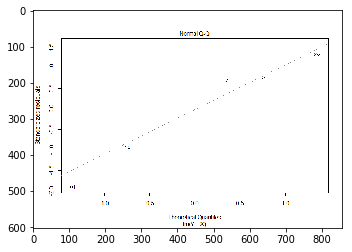

In [133]:
%matplotlib inline

# code to generate a 'QQ plot' to assess the linearity between the gene length and unique kmer-counts
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread("QQ_Plot.png")
imgplot = plt.imshow(img)
plt.show()


The QQ Plot shown above shows a *somewhat* linear relationship between the gene length and unique k-mer count, but not enough to establish a tight relationship.
Further investigation with more R code:
```R
abline(lm_model)
plot(X,Y)
abline(lm_model$coefficients[1], lm_model$coefficients[2])
sd2 <- sd(abs(lm_model$residuals))*2
abline(lm_model$coefficients[1]+sd2, lm_model$coefficients[2])
abline(lm_model$coefficients[1]-sd2, lm_model$coefficients[2])
```


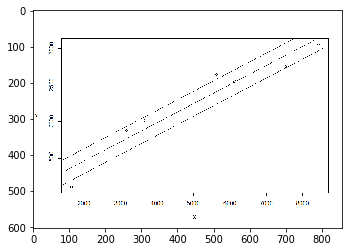

In [134]:
img=mpimg.imread("errors.png")
imgplot = plt.imshow(img)
plt.show()

The fitted model, plotted against the actual data and standard deviation show that there is a lot a great deal of variability between the different variables.
This could demonstrate that the great variance between the gene size and unique k-mer count is attributable to gene artifacts such as tandem repeat regions, which can greatly affect the unique k-mer count. 

**end of answer**

Now write a function to calculate the k-mer distance between a pair of genes given their k-mer count dictionaries. Recall that the k-mer distance is the fraction of k-mers that are unique to one of the sequences. You may find the Python `set` structure useful.

In [135]:
# ~~ GRADED CELL (2 marks) - complete this cell ~~

def kmer_distance(k1, k2):
    """
    Given two k-mer count dictionaries, calculate the k-mer distance between these two sets of kmers.
    The counts themselves are not used. Return a floating-point number for the distance.
    """
    
    kmer_dist = 0.0
    result = 0.0
    
    # if the strings are the same, then no need to perform a redundant calculation; 
    # furthermore, using the identity operator 'is' is faster than the '==' comparison operator in Python.
    if k1 is k2:
        result = 0.0
        return result
    
    # to calculate the distance between the sets of kmers, we need to find the overall sum of kmer counts.
    sum_1 = sum(k1.values())
    sum_2 = sum(k2.values())
    overall_sum = sum_1 + sum_2
    # iterate through each of the kmer keys. If the keys match then we add the corresponding values to the kmer_dist
    for key1, val1 in k1.items():
        for key2, val2 in k2.items():
            if key2 == key1:
                kmer_dist += (val1+val2)/2
        # the overall distance will then be a ratio of the kmer_dist to the sum of all the values in the two kmer dictionaries.
        result = kmer_dist/overall_sum
    
    return result

When you have implemented the `kmer_distance` function correctly, this test should give the right result:

In [136]:
# Should give: 0.4
test_counts_1 = {'GTA': 2, 'TAA': 1, 'AAG': 1, 'AGT': 1} 
test_counts_2 = {'GTA': 2, 'TAG': 1, 'AGT': 1, 'TAA': 1} 
kmer_distance(test_counts_1, test_counts_2)

0.4

Complete the function `create_kmer_dist_matrix` below. This function should create a new distance matrix containining k-mer distances. The matrix, as before, should be returned as a dict of dicts. Use your `kmer_distance` function and your `init_distance_matrix` function.

In [137]:
# ~~ GRADED CELL (2 marks) - complete this cell ~~

def create_kmer_dist_matrix(counts):
    """
    Take in a kmer counts dict, where keys are gene names and values are
    dicts of kmer counts (i.e. kmers as keys and counts as values). 
    Return a kmer distance matrix in the form of a dict of dicts of distances.
    """
    
    # initialise the matrix with our earlier generated function
    d_matrix = init_distance_matrix(counts)
    
    # Generate only the unique combinations of keys; this will help to remove redundant computations.
    key_combos = list(combinations(counts.keys(), 2))
    for item1, item2 in key_combos:
        # remove redundant computations from symmetrical matrix by setting reverse indices to the same value
        d_matrix[item1][item2] = d_matrix[item2][item1] = kmer_distance(counts[item1], counts[item2])
        # if the keys are the same, no need to calculate the kmer_distance; just set this value to zero.
        d_matrix[item1][item1] = d_matrix[item2][item2] = 0.0

    return d_matrix

In [263]:
dist_kmer = create_kmer_dist_matrix(kmer_counts)
print_distance_matrix(dist_kmer)

                KLF1      KLF3      KLF7       SP1       SP4       SP8       YY1
KLF1         0.00000   0.17201   0.18345   0.17990   0.15628   0.23494   0.21131
KLF3         0.17201   0.00000   0.40779   0.41038   0.39832   0.30993   0.31477
KLF7         0.18345   0.40779   0.00000   0.43258   0.41057   0.32260   0.31178
SP1          0.17990   0.41038   0.43258   0.00000   0.41318   0.30620   0.30842
SP4          0.15628   0.39832   0.41057   0.41318   0.00000   0.30062   0.30914
SP8          0.23494   0.30993   0.32260   0.30620   0.30062   0.00000   0.30521
YY1          0.21131   0.31477   0.31178   0.30842   0.30914   0.30521   0.00000


If you've implemented `create_kmer_dist_matrix` correctly, the following test case should display

                   GeneA     GeneB
    GeneA        0.00000   0.40000
    GeneB        0.40000   0.00000

In [139]:
test_counts = {'GeneA': {'GTA': 2, 'TAA': 1, 'AAG': 1, 'AGT': 1},
               'GeneB': {'GTA': 2, 'TAG': 1, 'AGT': 1, 'TAA': 1}} 
test_kmer_dist_matrix = create_kmer_dist_matrix(test_counts)
print_distance_matrix(test_kmer_dist_matrix)

               GeneA     GeneB
GeneA        0.00000   0.40000
GeneB        0.40000   0.00000


Check your implementation by completing the `create_kmer_dist_matrix_skbio` function below. It is very similar to the function above, but in this case you build a distance matrix by calculating k-mer distance using `skbio.sequence.distance.kmer_distance()`. The library function takes as input two sequences (from your `sequences` dictionary) and a value for `k`.

In [140]:
# ~~ GRADED CELL (2 marks) - complete this cell ~~

def create_kmer_dist_matrix_skbio(seqs, k = 6):
    """
    Take in a kmer counts dict, where keys are gene names and values are
    dicts of kmer counts (i.e. kmers as keys and counts as values). 
    Return a kmer distance matrix in the form of a dict of dicts of distances.
    
    Use skbio.sequence.distance.kmer_distance() to calculate distances for each cell.
    """
    from skbio.sequence.distance import kmer_distance as kd
    # initialise our distance matrix
    d_matrix = init_distance_matrix(seqs)
    # generate the unique key combinations, thus removing redundant combinations that would appear in nested 'for' loops.
    key_combos = list(combinations(seqs.keys(), 2))
    
    for item1, item2 in key_combos:
        
        # exploit the symmetry by setting the M[i][j] to M[j][i] (or M[item1][item2] to M[item2][item1]), thus removing 
        # redundant computations
        d_matrix[item1][item2] = d_matrix[item2][item1] = kd(seqs[item1], seqs[item2], k)
        # once again, no need to compute the kmer distance for self-same keys.
        d_matrix[item1][item1] = d_matrix[item2][item2] = 0.0

    return d_matrix


In [141]:
dist_kmer_lib = create_kmer_dist_matrix_skbio(sequences)
print_distance_matrix(dist_kmer_lib)

                KLF1      KLF3      KLF7       SP1       SP4       SP8       YY1
KLF1         0.00000   0.76318   0.74684   0.75740   0.77885   0.72753   0.76088
KLF3         0.76318   0.00000   0.38909   0.36713   0.41065   0.57779   0.56321
KLF7         0.74684   0.38909   0.00000   0.33055   0.38135   0.53578   0.56720
SP1          0.75740   0.36713   0.33055   0.00000   0.36641   0.56615   0.56789
SP4          0.77885   0.41065   0.38135   0.36641   0.00000   0.59619   0.57817
SP8          0.72753   0.57779   0.53578   0.56615   0.59619   0.00000   0.62102
YY1          0.76088   0.56321   0.56720   0.56789   0.57817   0.62102   0.00000


### Task 6 - Building trees with UPGMA
In this section you will implement the UPGMA algorithm to create ultrameric trees as described in lectures. You will output the trees in Newick format and import those Newick strings into an `skbio` library function to draw the trees as ASCII art.

To implement UPGMA, you should split the process into computable steps, write a function for each step and then use the functions to build your tree.

The first step of the UPGMA algorithm is finding the minimum distance in the matrix. Write a function `minimum_distance` that takes a distance matrix and returns a tuple with the distance and the two node names corresponding to the minimum distance.

In [142]:
# ~~ GRADED CELL (2 marks) - complete this cell ~~

def minimum_distance(dist):
    """
    Find and return a tuple containing the minimum distance
    in the distance matrix and the nodes names corresponding 
    to the minimum.
    """
    
    from math import inf
    # set minimum distance to a sentinel
    min_dist = inf
    min_nodes = ('0.0', 'zero', 'one')
    
    # iterate through each of the items
    for key1, val1 in dist.items():
        for key2, val2 in val1.items():
            # if the keys are the same, avoid computing minimum distance for this key pair
            if key1 is key2:
                continue
            # otherwise, if value corresponding to inner loop key is smaller than current minimum distance,
            # set the minimum distance to this new value
            if val2 < min_dist:
                min_dist = val2
            # then update the tuple to the new minimum, and the nodes that correspond to this minimum distance.
                min_nodes = (min_dist, key2, key1)
    
    return (min_nodes)

When you have implemented `minimum_distance` correctly, the following tests should give the right result:

In [143]:
# Should give: (3.3, 'geneB', 'geneC')
test_dist = {'geneA': {'geneA':0, 'geneB':5, 'geneC':12},
             'geneB': {'geneA':5, 'geneB':0, 'geneC':3.3},
             'geneC': {'geneA':12, 'geneB':3.3, 'geneC':0}}
print(minimum_distance(test_dist))

(3.3, 'geneC', 'geneB')


In [144]:
# Should give: (4.1, 'geneA', 'geneB')
test_dist = {'geneA': {'geneA':0, 'geneB':4.1, 'geneC':5},
             'geneB': {'geneA':4.1, 'geneB':0, 'geneC':7.2},
             'geneC': {'geneA':5, 'geneB':7.2, 'geneC':0}}
print(minimum_distance(test_dist))

(4.1, 'geneB', 'geneA')


Write another function `update_distances` that takes a distance matrix, the names of the nodes being combined, the name of the newly created node and a dictionary of node sizes and returns a new distance matrix with the result of merging and creating the new node.

In [145]:
# ~~ GRADED CELL (2 marks) - complete this cell ~~

def update_distances(dist, a, b, new_node, node_sizes):
    """
    Take in:
      dist : a distance matrix, structured as a dict of dicts of distances,
             with node names as keys
      a, b : names of nodes to merge
      new_node : the name of the new node to create 
      node_sizes : a dict giving the weightings (cluster sizes) of existing nodes,
                   with names as keys and sizes as values
    Return the new distance matrix, which will contain a node new_node
    and will not contain a or b.
    """
    try:
        
        # Get the weights for the different nodes (using *kwargs.get function)
        weight_a = node_sizes.get(a)
        weight_b = node_sizes.get(b)
        # declare the new matrix to hold the new values
        updated_mat = {}
        # the keys that aren't needed pertain to the initial nodes 'a' and 'b'
        filtered_keys = {a,b}
        # anonymous function to filter out unwanted nodes
        dictfilt = lambda x, y: dict([(i,x[i]) for i in x if i not in set(y)])
        # initialise the updated matrix to remove the unwanted nodes
        updated_mat = dictfilt(dist, filtered_keys)
        # get the node that we want to evalute
        new_keys = [keys for keys in dist.keys() if (keys not in a and keys not in b)]
   
        # declare our distances for node 'a' and node 'b'
        dist_a = 0.0
        dist_b = 0.0
        # get the distances corresponding to our chosen nodes
        new_val_a = [dist[key] for key in dist.keys() if key is a]
        new_val_b = [dist[key] for key in dist.keys() if key is b]
        
        
        # loop through the list of distances joined to node a
        for val in new_val_a:
            for key, val in val.items():
                # if the key isn't node 'a' or node 'b', then get the value corresponding to the complement of those nodes.
                if not key is b and not key is a:
                    dist_a = val
        
        # apply the loop as above, but for distances joined to b
        for val in new_val_b:
            for key, val in val.items():
                if not key is a and not key is b:
                    dist_b = val
        
        # we need to make the distances ultrametric, such that they need to be divided by two
        if 'gene' in a and 'gene' in b:        
            new_node_val = ((weight_a*dist_a)+(weight_b*dist_b))/2
        # if either 'a' or 'b' is an inner node and *not* a gene, then we need to divide the distances again by four
        elif ('gene' in a and 'node' in b) or ('gene' in b and 'node' in a):
            new_node_val = ((weight_a*dist_a)+(weight_b*dist_b))/4
        # if *both* 'a' and 'b' are inner nodes, not initial genes, then we need to divide them by eight, to reflect
        # the clustering relationship between the nodes.
        else:
            new_node_val = ((weight_a*dist_a)+(weight_b*dist_b))/8

        # update the matrix with the desired key and its computed distances 
        updated_mat[new_keys[0]] = {new_keys[0]: dist[new_keys[0]][new_keys[0]], new_node: new_node_val,}
        # update the matrix with the new node and the new computed distances
        updated_mat[new_node] = {new_node: 0.0, new_keys[0]: new_node_val}
        
    except (KeyError, TypeError):
        return "Either node value \"{}\" or node value \"{}\" doesn't exist.\nPlease ensure that " \
        "you've inputted existing nodes.".format(a, b)

    return(updated_mat)

Here are some test cases you can use in testing `update_distances`:

The below cell should print 

                   geneC    nodeAB
    geneC        0.00000   6.10000
    nodeAB       6.10000   0.00000

In [146]:
# Should return {'geneC': {'geneC': 0, 'nodeAB': 6.1}, 'nodeAB': {'geneC': 6.1, 'nodeAB': 0.0}}, 
# and also print the test output as shown above
test_dist = {'geneA': {'geneA':0, 'geneB':4.1, 'geneC':5},
             'geneB': {'geneA':4.1, 'geneB':0, 'geneC':7.2},
             'geneC': {'geneA':5, 'geneB':7.2, 'geneC':0}}
test_sizes = {'geneA': 1, 'geneB': 1, 'geneC': 1}
test_output = update_distances(test_dist, 'geneA', 'geneB', 'nodeAB', test_sizes)
print(test_output)
print_distance_matrix(test_output)

{'geneC': {'geneC': 0, 'nodeAB': 6.1}, 'nodeAB': {'nodeAB': 0.0, 'geneC': 6.1}}
               geneC    nodeAB
geneC        0.00000   6.10000
nodeAB       6.10000   0.00000


The below cell should print 

                   geneC    nodeAB
    geneC        0.00000   5.55000
    nodeAB       5.55000   0.00000

In [147]:
# Should return {'geneC': {'geneC': 0, 'nodeAB': 5.55}, 'nodeAB': {'geneC': 5.55, 'nodeAB': 0.0}}, 
# and also print the test output as shown above
test_dist = {'nodeA': {'nodeA':0, 'geneB':4.1, 'geneC':5},
             'geneB': {'nodeA':4.1, 'geneB':0, 'geneC':7.2},
             'geneC': {'nodeA':5, 'geneB':7.2, 'geneC':0}}
test_sizes = {'nodeA': 3, 'geneB': 1, 'geneC': 1}
test_output = update_distances(test_dist, 'nodeA', 'geneB', 'nodeAB', test_sizes)
print(test_output)
print_distance_matrix(test_output)

{'geneC': {'geneC': 0, 'nodeAB': 5.55}, 'nodeAB': {'nodeAB': 0.0, 'geneC': 5.55}}
               geneC    nodeAB
geneC        0.00000   5.55000
nodeAB       5.55000   0.00000


In [334]:
# ~~ GRADED CELL (2 marks) - complete this cell ~~

"""Altered version of original 'update distance' function, adapted for use with the UPGMA function."""
def update_distances_2(dist, a, b, new_node):
    """
    Take in:
      dist : a distance matrix, structured as a dict of dicts of distances,
             with node names as keys
      a, b : names of nodes to merge
      new_node : the name of the new node to create 
      node_sizes : a dict giving the weightings (cluster sizes) of existing nodes,
                   with names as keys and sizes as values
    Return the new distance matrix, which will contain a node new_node
    and will not contain a or b.
    """

    try:
        layer_size = 0
        for layers in dist:
            layer_size += 1
        
        counter = 1
        
        if ('node' in a) and ('node' in b):
            counter+=2
        
        elif ('node' in a) or ('node' in b):
            counter+=1
            
        orig_dist = {}
        updated_mat = {}
        updated_keys = [keys for keys in dist.keys() if (keys not in a and keys not in b)]
        updated_keys += [new_node]
        dist_a = 0.0
        dist_b = 0.0
        new_val_a = [dist[key] for key in dist.keys() if key is a]
        new_val_b = [dist[key] for key in dist.keys() if key is b]

        for val in new_val_a:
            for key, val in val.items():
                if not key is b and not key is a:
                    dist_a = val

        for val in new_val_b:
            for key, val in val.items():
                if not key is a and not key is b:
                    dist_b = val
        
        new_node_val = ((dist_a)+(dist_b))/(2**(counter))

        if len(updated_keys) > 0:
            updated_mat[updated_keys[0]] = {updated_keys[0]: dist[updated_keys[0]][updated_keys[0]], 
                                        new_node: new_node_val, a: dist[a][updated_keys[0]]}
            updated_mat[new_node] = {new_node: 0.0, updated_keys[0]: new_node_val}
        
    except (KeyError):
        return "Either node value \"{}\" or node value \"{}\" doesn't exist.\nPlease ensure that " \
        "you've inputted existing nodes.".format(a, b)

    return(updated_mat)
def upgma_beta(dist):
    """
    Build a UPGMA tree based on the given distance matrix
    and return the tree as a string in Newick format.
    """
    
    from collections import ChainMap
    
    # count the number of 'outer' keys so we can update the distance in our output tree the number of times \
    # that the counter yields a key:
    counter = 0
    for keys in dist.keys():
        counter+=1
    
    

    min_1 = minimum_distance(dist)
    new_node = 'node{}{}'.format(min_1[1][len(min_1[1])-1], min_1[2][len(min_1[2])-1])
    a  = update_distances_2(dist, min_1[1], min_1[2], new_node)
    min_2 = minimum_distance(a)
    new_node_2 = 'node{}{}'.format(min_2[1][len(min_2[1])-1], min_2[2][len(min_2[2])-1])
    b = update_distances_2(dist, min_2[1], min_2[2], new_node_2)
    min_3 = minimum_distance(b)
    new_node_3 = 'node{}{}'.format(min_3[1][len(min_3[1])-1], min_3[2][len(min_3[2])-1])
    c  = update_distances_2(dist, min_3[1], min_3[2], new_node_3)


    def divider(dic):
        assert type(dic) is dict

        for key, val in dic.items():
            if 'gene' in key:
                for inner_key in val.keys():
                    if 'gene' in inner_key:
                        if val[inner_key] > 0:
                            val[inner_key]/=2
            elif 'node' in key:
                for inner_key in val.keys():
                    if 'gene' in inner_key:
                        val[inner_key]/=2
        return dic


    a = divider(a)
    b = divider(b)
    c = divider(c)     
    d = ChainMap(a,b,c)
    f = d.copy()
    e = {}
    for key, val in d.items():
        for key2, val2 in f.items():
            for inner_key, inner_val in val.items():
                for inner_key2, inner_val2 in val2.items():
                    if 'node' not in inner_key and inner_val != 0:
                        if inner_key2 == inner_key:
                            if inner_val2 < inner_val and (inner_val2 != 0):
                                e[inner_key] = inner_val2
                    elif 'node' not in inner_key:
                        e[inner_key] = inner_val2

    newick_tree = tuple(zip(e.items()))
    
    return newick_tree

Write a final function `upgma` that takes a distance matrix as input and returns a tree as a Newick formatted string.

Because we want to output our tree in Newick format, you will need an additional dictionary of Newick strings for each node that gets created. You also need to keep track of the branch lengths. Recall that the $D_{ij}$ in the algorithm from lecture is the length to the tip not the internal branch length, but the Newick string expects the internal branch lengths.

In [351]:
"""Helper functions to generate UPGMA tree in newick format. Please note that the final function, 'UPGMA' is found at the bottom of this cell.
Please note that the function 'make_upgma' was adapted from Github in order to generate 'correct' trees for the cells found below,
as my solution in the cell above gave correct output, but not in newick tree format."""


# Convert our input dictionary to a numpy matrix
def convertToMatrix(dic):      
    matrix = []
    matrix = np.array([[dic[gene1][gene2] for gene2 in sorted(dic[gene1])] for gene1 in sorted(dic)])
    length = len(matrix)
    return matrix, length

# Function to identify the lowest indices in a matrix; similiar to 'minimum_distane' function used for dictionaries found in earlier cell.
def min_indices(matrix, length):
    import math
    a = 0
    b = 0
    final_min=math.inf
    
    for i in range(length):

        stand_in = matrix[i]
        min_value = min(stand_in[np.nonzero(stand_in)])
        j = stand_in.tolist().index(min_value)

        if min_value < final_min: 
            a = i
            b = j
            final_min = min_value
   
    return a, b



def make_upgma(mat,length,dic):
    nodes = []
    count = 0
    
    # append to our node list the number of initial genes/nodes in the input matrix.
    for x in range(length):    
        nodes.append("A"+str(x+1))
    
    # The number of clusters will be the length of the input matrix
    numClus = x+1
    
    # while there are nodes left to process, we update the distance matrix for each node
    while(length>1):
        
        numClus +=1
        count +=1
        
        # determine the smallest cell in the matrix
        min_index_a,min_index_b = min_indices(mat, length)
        
        nodes.append("A"+str(numClus))  
        
        # Determine the smallest distance determined by the minimum indices obtained above.  Div ide by 2 to keep the tree ultrametric.
        distance = mat[min_index_a][min_index_b]/2
        
        size = 0
        if nodes[min_index_a] not in dic.keys():
            size = 1
            distance_a = distance
        else:
            size = dic[nodes[min_index_a]][4]
            distance_a = distance-max(dic[nodes[min_index_a]][0],dic[nodes[min_index_a]][2])
        
        if nodes[min_index_b] not in dic.keys():
            size = size+1
            distance_b = distance
        else:
            size = size+dic[nodes[min_index_b]][4]
            distance_b = distance-max(dic[nodes[min_index_b]][0],dic[nodes[min_index_b]][2])
        dic["A"+str(numClus)] = [distance_a,nodes[min_index_a],distance_b,nodes[min_index_b],size]
        
        # Insert a new cell into the matrix
        mat = np.insert(mat, length, values=float(0), axis=0)
        mat = np.insert(mat, length, values=float(0), axis=1)
        
        
        # Exploit symmetry of matrix by avoiding redundant calculations. Keep tree ultrametric by dividing size by the length of the node from the root.
        for i in range(length):
            mat[-1][i]=mat[i][-1] = (mat[i][min_index_a] + mat[i][min_index_b])/2
        
        # If we have the lowest index at min_index_a, then delete the index from the cell
        if min_index_a < min_index_b:
            mat = np.delete(mat, min_index_a, 0)
            mat = np.delete(mat, min_index_a, 1)
            mat = np.delete(mat, (min_index_b)-1, 0)
            mat = np.delete(mat, (min_index_b)-1, 1)
            # update the length of the matrix after removing the minimum value
            length = len(mat)
            # delete the nodes corresponding to the minimum value
            del nodes[min_index_a]
            del nodes[min_index_b]
        
        # Otherwise, delete the lowest indices from both axes
        else:
            mat = np.delete(mat, min_index_a, 0)
            mat = np.delete(mat, min_index_a, 1)
            mat = np.delete(mat, min_index_b, 0)
            mat = np.delete(mat, min_index_b, 1)            
            length = len(mat)
            del nodes[min_index_a]
            del nodes[min_index_b]
        
    return "A"+str(numClus)

"Generate the newick tree format based on the UPGMA clustering algorithm output"

def generateNewick(dic, node):
    nodes = []
    output = []
    nodes.append(node)
    # while there are still nodes to process, pop them out and append to our newick tree
    while nodes:
        
        cur = nodes.pop()
        # if the current node is a legitimate vlaue, then append it to the output
        if isinstance(cur , float ):
            if isinstance(prev , float ):
                output.pop()
                output.append(")")
            output.append(":"+str(cur))
            output.append(",")
            
        #if the node already exists in our input dictionary, then we need to process its children.
        elif cur in dic.keys():
        
            nodes.append(dic[cur][0])
            nodes.append(dic[cur][1])
            nodes.append(dic[cur][2])
            nodes.append(dic[cur][3])
            output.append("(")
        # otherwise, append the node/gene to the tree as it is.
        else:
            output.append(cur)
        prev = cur
        
    output.pop()
    output.append(")")  
    return output


# final function to generate the UPGMA tree; please note that nodes that are printed do not contain the original keys for the input dictionary/matrix \
# rather, they are labeld through A1.....An
def upgma(dic):

    mat, length = convertToMatrix(dic)
    out = make_upgma(mat, length, dic)
    final=generateNewick(dic,out)
    final=''.join(final)
    final=final+";"
    return(final)

Here is a test case you can use to help you test your `upgma` solution:

In [352]:
# Should give: '(geneC:3.05,(geneA:2.05,geneB:2.05):1.0);'
test_dist = {'geneA': {'geneA':0, 'geneB':4.1, 'geneC':5},
             'geneB': {'geneA':4.1, 'geneB':0, 'geneC':7.2},
             'geneC': {'geneA':5, 'geneB':7.2, 'geneC':0}}

test = upgma(test_dist)
test

'((A2:2.05,A1:2.05):1.0,A2:3.05);'

Let's try UPGMA out using different distance measures. The following three blocks generate trees using your `upgma` function and print those trees to the console. There is one block per distance method.

In [348]:
newick = upgma(dist_pairwise)
t = skbio.io.read(StringIO(newick), format="newick", into=skbio.tree.TreeNode)
print("Local alignment score distance, UPGMA")
print()
print(newick)
print()
print(t.ascii_art())

Local alignment score distance, UPGMA

((((A5:0.00223214285714,A4:0.00223214285714):0.00318925865801,A6:0.00542140151515):0.00588557854183,A7:0.011306980057):0.000899052514212,((A3:0.00416666666667,A1:0.00416666666667):0.00101886595789,A2:0.00518553262456):0.00702049994663);

                                        /-A5
                              /--------|
                    /--------|          \-A4
                   |         |
          /--------|          \-A6
         |         |
         |          \-A7
---------|
         |                    /-A3
         |          /--------|
          \--------|          \-A1
                   |
                    \-A2


In [262]:
newick = upgma(dist_msa)
t = skbio.io.read(StringIO(newick), format="newick", into=skbio.tree.TreeNode)
print("Multiple sequence alignment percent identity distance, UPGMA")
print()
print(t)
print()
print(t.ascii_art())
newick

Multiple sequence alignment percent identity distance, UPGMA

((((S5:0.288209606987,S4:0.288209606987):0.0383054739313,S6:0.326515080918):0.0103158126574,((S3:0.305653710247,S2:0.305653710247):0.0174915926499,S1:0.323145302897):0.0136855906783):0.365664397629,S7:0.379349988307);


                                        /-S5
                              /--------|
                    /--------|          \-S4
                   |         |
                   |          \-S6
          /--------|
         |         |                    /-S3
         |         |          /--------|
---------|          \--------|          \-S2
         |                   |
         |                    \-S1
         |
          \-S7


'((((S5:0.288209606987,S4:0.288209606987):0.0383054739313,S6:0.326515080918):0.0103158126574,((S3:0.305653710247,S2:0.305653710247):0.0174915926499,S1:0.323145302897):0.0136855906783):0.365664397629,S7:0.379349988307);'

In [264]:
newick = upgma(dist_kmer)
t = skbio.io.read(StringIO(newick), format="newick", into=skbio.tree.TreeNode)
print("K-mer distance, UPGMA")
print()
print(t)
print()
print(t.ascii_art())

K-mer distance, UPGMA

((((((S5:0.0781390856407,S1:0.0781390856407):0.051972093046,S7:0.130111178687):0.01313711038,S6:0.143248289067):0.00892270241258,S4:0.152170991479):0.026662117243,S2:0.178833108722):0.0163748648442,S3:0.195207973566);


                                                            /-S5
                                                  /--------|
                                        /--------|          \-S1
                                       |         |
                              /--------|          \-S7
                             |         |
                    /--------|          \-S6
                   |         |
          /--------|          \-S4
         |         |
---------|          \-S2
         |
          \-S3


#### Task 6 - Question 1
Why are the trees different? (max 50 words)

Write your answer in the markdown cell below.

~~ GRADED CELL (3 marks) - complete this cell ~~

The trees are different as the child nodes are based upon finding the minimum distance from the input pairwise distance matrix, and then joining these into a new cluster. Because, for example, the minimum distance found between each gene is different in dist_msa (SP1 to SP4), and dist_kmer (KLF1 to SP4), this means that there will be different relationships between the clusters/genes, and therefore different trees, owing to their different initial distance matrices.

### Task 7 - Building trees with neighbor joining
In this section you will use the `skbio` implementation of the neighbor joining algorithm to build trees and visualize them as in the previous section.

The following code converts a dictionary-based distance matrix to a `DistanceMatrix` object suitable for the `skbio` neighbor joining implementation.

In [165]:
def convert_distance_matrix(dist):
    genes = sorted(dist.keys())
    dist_lists = list()

    for key1 in genes:
        a = list()
        for key2 in genes:
            a.append(dist[key1][key2])
        dist_lists.append(a)
        
    return skbio.DistanceMatrix(dist_lists, genes)

The following three blocks generate trees using the `skbio` neighbor joining implementation and print those trees to the console. There is one block per distance method.

In [166]:
m = convert_distance_matrix(dist_pairwise)
t = skbio.tree.nj(m)
print("Local alignment score distance, NJ")
print()
print(t)
print()
print(t.ascii_art())

Local alignment score distance, NJ

(KLF1:0.004433,(KLF3:0.003393,(YY1:0.012885,(SP8:0.003723,(SP4:0.003945,SP1:0.000519):0.004887):0.004308):0.00792):0.002811,KLF7:0.0039);


          /-KLF1
         |
         |          /-KLF3
         |---------|
         |         |          /-YY1
         |          \--------|
---------|                   |          /-SP8
         |                    \--------|
         |                             |          /-SP4
         |                              \--------|
         |                                        \-SP1
         |
          \-KLF7


In [176]:
m = convert_distance_matrix(dist_msa)
t = skbio.tree.nj(m)
print("Multiple sequence alignment percent identity distance, NJ")
print()
print(t)
print()
print(t.ascii_art())

Multiple sequence alignment percent identity distance, NJ

((SP8:0.312767,(SP4:0.292451,SP1:0.283968):0.052054):0.020465,(KLF1:0.3114,(KLF7:0.298809,KLF3:0.312498):0.029237):0.003537,YY1:0.421869);


                    /-SP8
          /--------|
         |         |          /-SP4
         |          \--------|
         |                    \-SP1
         |
---------|          /-KLF1
         |---------|
         |         |          /-KLF7
         |          \--------|
         |                    \-KLF3
         |
          \-YY1


In [177]:
m = convert_distance_matrix(dist_kmer)
t = skbio.tree.nj(m)
print("K-mer distance, NJ")
print()
print(t)
print()
print(t.ascii_art())

K-mer distance, NJ

((SP4:0.163161,KLF1:0.0):0.024277,((SP8:0.122801,SP1:0.183402):0.018606,(YY1:0.122458,KLF7:0.189319):0.014609):0.006869,KLF3:0.182747);


                    /-SP4
          /--------|
         |          \-KLF1
         |
         |                    /-SP8
         |          /--------|
---------|         |          \-SP1
         |---------|
         |         |          /-YY1
         |          \--------|
         |                    \-KLF7
         |
          \-KLF3


#### Task 7 - Question 1
Based on all the trees you've generated, which distance method do you think is the best and why? (max 100 words)

Write your answer in the markdown cell below.

~~ GRADED CELL (3 marks) - complete this cell ~~

Taking the naming schema for the sequences to indicate their general homology, where, e.g. KLFs ought to be more homologous/genetically-similar than other ZF sequences, the MSA percent identity tree appears to give the most authentically accountable tree. For the k-mer distance tree, the phylogenetic relationships seem extremely mixed whereby SP4 and KLF1 have been deemed to be the evolutionarily most similar. The local alignment score tree seemed to have less issue finding genetically-similar relationships amongst the various homologues, but has inferred that the SPs and YYs have all descended from KLF1, which might not be the case. The local alignment score tree seems to give almost as good results as to the MSA tree, in my opinion